# 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 불러오기

이 데이터셋은 Iowa주 Ames에 있는 주거용 주택에 대한 정보와 가격 데이터이다.

우리의 목표는 주택을 설명하는 79개의 설명 변수들로 주택의 가격을 예측하는 것이다.

In [2]:
path = './data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# 데이터 살펴보기

모든 변수에 대한 설명은 대회 데이터 파일의 data_description.txt 파일을 참고했다.

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA

## train test 병합

In [9]:
num_train = train.shape[0]
id = test.Id

df = pd.concat([train, test])
df.shape

(2919, 81)

## 상관관계 확인

In [10]:
# corr = df.corr()
# sns.heatmap(corr)

## 예측 타겟(SalePrice) 분포 확인

<Axes: >

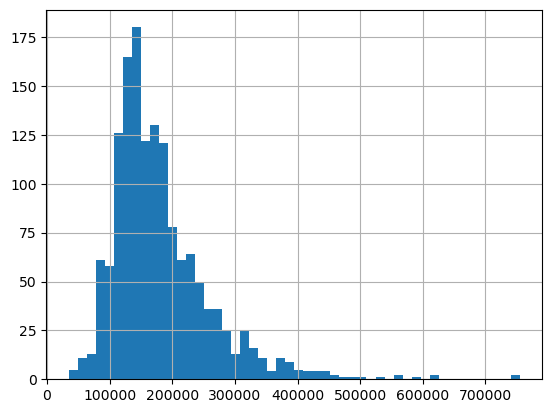

In [11]:
df.SalePrice.hist(bins=50)

## 결측치 확인

### 전체 결측치 확인

In [12]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

~~결측치가 절반 이상이면 삭제~~

우선 결측치가 절반 이상인 columns 를 살펴보겠다.

In [13]:
df.isna().sum()[df.isna().sum()>len(df)/2]

Alley          2721
PoolQC         2909
Fence          2348
MiscFeature    2814
dtype: int64

### Alley

Alley는 주택에 접근하는 골목의 유형으로 Grvl은 자갈길, Pave는 포장길, Nan은 골목이 없음을 뜻한다고 한다.

In [14]:
df.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Alley와 비슷한 데이터로는 Street column으로 주택에 접근하는 도로 유형에 대한 정보이다.

In [15]:
df.Street.value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

Alley의 결측치는 None이라는 이름으로 대체시킨다.

In [16]:
df.Alley = df.Alley.fillna('None')
df.Alley.value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

### PoolQC

그 다음은 PoolQC이다. PoolQC는 Pool quality의 약자로 각 변수의 의미는 아래와 같다.
- Ex : Excellent
- Gd : Good
- TA : Average/Typical
- Fa : Fair
- NA : No Pool

In [17]:
df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

PoolQC의 결측치도 None으로 대체시켜주었다.

In [18]:
df.PoolQC = df.PoolQC.fillna('None')
df.PoolQC.value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

### Fence & MiscFeature

Fence는 울타리의 유무를, MiscFeature는 다른 column에서 다루지 않는 기타 기능을 의미한다고 한다.

Fence의 결측치는 울타리가 없음을, MiscFeature의 결측치는 기타 기능이 없음을 뜻하므로 위에서와 같이 None으로 대체해주었다.

In [19]:
df.Fence = df.Fence.fillna('None')
df.Fence.value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [20]:
df.MiscFeature = df.MiscFeature.fillna('None')
df.MiscFeature.value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

이제 남은 결측치를 살펴보자.

절반 이상인 결측치는 사라졌으나 절반에 가까운 FireplaceQu와 몇 백개가 결측치인 LotFrontage가 눈에 띈다.

In [21]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

### LotFrontage

LotFrontage는 주택과 연결된 거리의 피트 단위의 직선 거리이다.

데이터의 특이한 점은 21피트 이하는 존재하지 않는 것을 확인할 수 있다.

아마 21피트 이하는 단순히 기록이 되지 않았거나, 법으로 보장된 최소 거리가 21피트라 그런것 둘중 하나일 것이다.

이 변수는 나중에 다른 변수들을 사용해 결측치를 예측하는 모델을 만들어보자.

<Axes: >

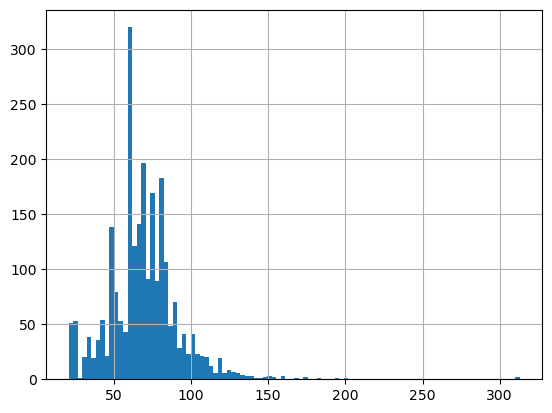

In [22]:
display(df.LotFrontage.hist(bins=100))

In [23]:
print(f'min LotFrontage is: {df.LotFrontage.min()}')

min LotFrontage is: 21.0


### FireplaceQu

FireplaceQu는 벽난로의 유무를 나타내는 변수이다. 결측치는 벽난로가 없음을 나타내므로 결측치를 None으로 대치해주자.

In [24]:
df.FireplaceQu = df.FireplaceQu.fillna('None')
df.FireplaceQu.value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

이제 나머지 결측치들을 살펴보도록 하자.

변수의 이름들을 살펴보다보니 Exterior..., MasVnr... 등 비슷한 이름을 가진 변수들을 발견해 살펴보기로 했다.

In [25]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

### Exterior...

In [26]:
df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [27]:
df.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

우선 Exterior로 시작하는 두 변수는 주택 외장재에 대한 정보이다. 1st는 첫 번째 외장재이고, 2nd는 두 가지 이상의 자재를 사용 시 기록되었다고 나와있다.

그러나 첫 번째 외장재와 두 번째 외장재가 동일한 경우가 다수 발견된 것으로 보아 한 가지의 자재만 사용한 경우도 2nd까지 전부 표기한 것을 알 수 있다.

In [28]:
df.loc[:, ['Exterior1st', 'Exterior2nd']].value_counts(sort=False)

Exterior1st  Exterior2nd
AsbShng      AsbShng          35
             CmentBd           1
             Plywood           5
             Stucco            1
             VinylSd           1
             Wd Sdng           1
AsphShn      AsphShn           2
BrkComm      Brk Cmn           4
             Stucco            1
             Wd Sdng           1
BrkFace      AsbShng           1
             BrkFace          44
             HdBoard           3
             MetalSd           3
             Plywood           8
             Stone             3
             Stucco            3
             VinylSd           1
             Wd Sdng          20
             Wd Shng           1
CBlock       CBlock            1
             VinylSd           1
CemntBd      CmentBd         124
             Wd Sdng           1
             Wd Shng           1
HdBoard      AsphShn           1
             BrkFace           1
             HdBoard         383
             ImStucc           6
             Metal

해당 두 변수의 결측치가 동일한 주택에서 나온 것을 확인할 수 있었다.

In [29]:
df.loc[(df.Exterior1st.isna() & df.Exterior2nd.isna()), ['Id', 'Exterior1st', 'Exterior2nd']]

,Id,Exterior1st,Exterior2nd
691,2152,NaN,NaN


벽이 없는 주택은 존재하지 않을 것이므로, 우리는 이 것이 결측치인 것을 확신할 수 있었다.

그래서 해당 결측치를 어떻게 채워줄지 고민하다가 ExterQual(외장재 품질)와 ExterCond(외장재의 상태)가 외장재의 종류마다 다를 것이라고 생각해 상관관계를 확인해 보려고 한다.

In [30]:
df[df.Id == 2152]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal,NaN


OverallQual(전반적인 재료 및 마감 품질)도 고려해 값을 확인해봤더니 상위 값들의 1st와 2nd에 같은 재료가 사용되었고, 재료 사용 빈도는
1. MetalSd
2. Wd Sdng
3. HdBoard

순으로 높은 것을 확인할 수 있다.

OverallQual을 고려하지 않았을 때 MetalSd의 순위가 3위로 낮았지만, 퀄리티를 고려하니 1위로 올라간 것으로 보아 MetalSd가 유력해보여 해당 값으로 대체해주겠다.

In [31]:
df.loc[(df.ExterQual == 'TA') & (df.ExterCond == 'TA') & (df.OverallQual == 5), ['Exterior1st', 'Exterior2nd']].value_counts()

Exterior1st  Exterior2nd
MetalSd      MetalSd        126
Wd Sdng      Wd Sdng        119
HdBoard      HdBoard        118
VinylSd      VinylSd         80
Plywood      Plywood         51
BrkFace      BrkFace         18
HdBoard      Plywood         18
WdShing      Wd Shng         14
CemntBd      CmentBd         14
AsbShng      AsbShng         11
BrkFace      Wd Sdng         10
Wd Sdng      Plywood          7
Stucco       Stucco           6
Wd Sdng      HdBoard          5
HdBoard      Wd Shng          4
Wd Sdng      Wd Shng          4
BrkFace      Plywood          3
HdBoard      Wd Sdng          3
Plywood      HdBoard          3
MetalSd      Wd Sdng          2
Wd Sdng      MetalSd          2
BrkFace      MetalSd          2
MetalSd      Stucco           2
Wd Sdng      VinylSd          1
BrkComm      Brk Cmn          1
AsphShn      AsphShn          1
WdShing      HdBoard          1
Wd Sdng      ImStucc          1
WdShing      Plywood          1
             Stucco           1
VinylSd      Wd

In [32]:
df.loc[df.Exterior1st.isna() | df.Exterior2nd.isna(), ['Exterior1st', 'Exterior2nd']] = 'MetalSd'

### MasVnr...

MasVnrType과 MasVnrArea의 결측치를 알아보자.

MasVnr...은 집 외장재가 벽돌로 구성되어있는 경우를 뜻한다.

이 변수는 잘은 모르겠지만 Exterior가 둘 다 벽돌이 아닌데도 MasVnr은 벽돌인 경우가 있는 것으로 보아 Exterior랑은 다른 외장재 부분인 것 같다.

In [33]:
df[df.MasVnrType.isna()].shape[0]

24

In [34]:
df[df.MasVnrArea.isna()].shape[0]

23

각각 24개와 23개의 결측치중에 23개가 곂치는 것을 확인할 수 있다.

In [35]:
df[df.MasVnrType.isna() & df.MasVnrArea.isna()].shape

(23, 81)

In [36]:
df[df.MasVnrType.isna() & df.MasVnrArea.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000.0
231,1692,60,RL,NaN,12891,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,None,None,None,0,7,2009,WD,Normal

나머지 한 결측치도 확인해봤다.

In [37]:
df[df.MasVnrType.isna() & ~df.MasVnrArea.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1150,2611,20,RL,124.0,27697,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,None,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,None,None,None,0,11,2007,COD,Abnorml,NaN


우선 MasVnrType의 값들을 알아봤다.

In [38]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

MasVnrType이 None이 아닌 값들의 Exterior들을 살펴보았다.

역시나 전혀 연관이 없는 듯하다..

In [39]:
df.loc[df.MasVnrType != None, ['Exterior1st', 'Exterior2nd']].value_counts()

Exterior1st  Exterior2nd
VinylSd      VinylSd        1005
MetalSd      MetalSd         438
HdBoard      HdBoard         383
Wd Sdng      Wd Sdng         353
Plywood      Plywood         186
CemntBd      CmentBd         124
BrkFace      BrkFace          44
WdShing      Wd Shng          41
HdBoard      Plywood          41
AsbShng      AsbShng          35
Stucco       Stucco           33
BrkFace      Wd Sdng          20
Plywood      Brk Cmn          18
Wd Sdng      Wd Shng          18
             Plywood          17
WdShing      Plywood          10
VinylSd      Wd Shng           9
BrkFace      Plywood           8
Wd Sdng      HdBoard           7
Plywood      HdBoard           6
HdBoard      ImStucc           6
AsbShng      Plywood           5
HdBoard      Wd Shng           5
Stucco       Wd Shng           4
BrkComm      Brk Cmn           4
Plywood      Wd Sdng           4
Wd Sdng      MetalSd           4
Plywood      ImStucc           4
HdBoard      Wd Sdng           3
BrkFace      HdBoa

MasVnrArea가 있는 결측치 하나는 None 다음의 최빈값인 BrkFace로 대체해주고, 나머지 값들은 다 None과 0으로 대체해주겠다.

In [40]:
df.loc[(df.Exterior1st == 'Plywood') & (df.Exterior2nd == 'Plywood'), ['MasVnrType']].value_counts()

MasVnrType
None          102
BrkFace        71
Stone           9
BrkCmn          3
dtype: int64

In [41]:
df.loc[df.MasVnrType.isna() & ~df.MasVnrArea.isna(), 'MasVnrType'] = 'BrkFace'

In [42]:
df.MasVnrType = df.MasVnrType.fillna('None')

In [43]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

### Bsmt...

Bsmt는 지하실과 관련된 변수로 관련 변수 목록은 아래와 같다.
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath

우선 위 변수들 중 하나라도 결측치가 있는 값은 전부 살펴봤다.

특이사항으로는 BsmtFinType2 값만 결측치인 Id 333번과 BsmtQual 만 결측값인 2218, 2219번, BsmtExposure만 결측치인 949, 1488, 2041, 2186, 2525번, BsmtExposure이 결측인 2349번이 있었다.

In [44]:
df.loc[(df.BsmtQual.isna()|df.BsmtCond.isna()|df.BsmtExposure.isna()|df.BsmtFinType1.isna()|df.BsmtFinSF1.isna()|df.BsmtFinType2.isna()|df.BsmtFinSF2.isna()|df.BsmtUnfSF.isna()|df.TotalBsmtSF.isna()|df.BsmtFullBath.isna()|df.BsmtHalfBath.isna()), 
       ['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
182,183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
259,260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
332,333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
342,343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362,363,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


333번의 값을 보니, BsmtFinSF2에 완성된 영역이 있는데 결측치인것으로 보아 지하실이 없는 경우는 아닌 것 같다.

In [45]:
df[df.Id == 333]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2009,WD,Normal,284000.0


BsmtFinSF2의 면적이 0이 아니면서 BsmtUnfSF이 0이 아닌 값들을 살펴보자.

결과를 살펴보니 자하실의 첫 번째 영역이 GLQ(양호한 거주구역)인 경우에 두 번째 영역은 ALQ(평균 거주구역)와 Rec(평균 오락실)로 각각 15개씩으로 나뉘었다.

In [46]:
df.loc[(df.BsmtFinSF2 != 0) & (df.BsmtUnfSF != 0), ['BsmtFinType1', 'BsmtFinType2']].value_counts()

BsmtFinType1  BsmtFinType2
BLQ           Rec             33
ALQ           Rec             32
              BLQ             28
              LwQ             17
Rec           BLQ             16
              LwQ             16
BLQ           LwQ             15
GLQ           ALQ             15
              Rec             15
Rec           ALQ             13
LwQ           BLQ             11
              Rec             10
GLQ           LwQ              9
BLQ           GLQ              7
LwQ           ALQ              7
              GLQ              5
GLQ           BLQ              4
BLQ           ALQ              4
Rec           GLQ              4
ALQ           GLQ              3
BLQ           BLQ              1
GLQ           Unf              1
dtype: int64

전체 데이터에서 BsmtFinType2는 Rec인 경우가 ALQ인 경우보다 두 배나 많았는데, 위의 데이터에서는 ALQ의 비중이 2배나 높아진 것으로 보아 ALQ일 확률이 조금 더 높아보인다.

In [47]:
df.BsmtFinType2.value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

Type1이 GLQ이면서 Type2가 REC인 경우와 ALQ인 경우의 SalePrice 평균을 비교해보자.

In [48]:
rec_mean = df.loc[(df.BsmtFinType1 == 'GLQ') & (df.BsmtFinType2 == 'Rec'), 'SalePrice'].mean()
alq_mean = df.loc[(df.BsmtFinType1 == 'GLQ') & (df.BsmtFinType2 == 'ALQ'), 'SalePrice'].mean()
print(f'Type1이 GLQ일 때, Type2에 따른 SalePrice의 평균 - Rec: {rec_mean} / ALQ: {alq_mean}')

Type1이 GLQ일 때, Type2에 따른 SalePrice의 평균 - Rec: 196458.33333333334 / ALQ: 303450.0


해당 데이터의 표본이 적어 신뢰도가 떨어져, Type2의 정보만 확인해봤다.

결과적으로 Type2가 ALQ인 경우의 SalePrice가 Id 333의 SalePrice인 284000과 가까우므로 ALQ로 대치하기로 결정했다.

In [49]:
rec_mean = df.loc[(df.BsmtFinType2 == 'Rec'), 'SalePrice'].mean()
alq_mean = df.loc[(df.BsmtFinType2 == 'ALQ'), 'SalePrice'].mean()
print(f'Type2에 따른 SalePrice의 평균 - Rec: {rec_mean} / ALQ: {alq_mean}')

Type2에 따른 SalePrice의 평균 - Rec: 164917.12962962964 / ALQ: 209942.1052631579


In [50]:
df.loc[df.Id == 333, 'BsmtFinType2'] = 'ALQ'

이제 BsmtQual과 BsmtCond와 BsmtExposure중 하나만 결측값인 경우를 살펴보자. 이 경우는 지하실이 없음을 의미한는 것이 아닌 단순한 결측값일 것이다.

BsmtQual은 지하실 높이, BsmtCond은 지하실의 상태, BsmtExposure은 지하실 벽이 노출되는 정도이다.

우선 BsmtExposure(벽 노출도)가 높을 수록 습도나 균열 상태가 좋을 것으로 추측 되어 BsmtCond(지하실 상태)와 관계가 있을 것으로 추측된다.

BsmtCond(지하실 상태) 값은 OverallCond(주택의 전반적인 상태 등급) 변수와 밀접한 영향을 가지고 있을 것이므로 위 세 개의 변수를 비교해 결측치를 채울 것이다.

BsmtQual(지하실 층고)는 GrLivArea (지상의 전체 거주 면적)과 연관이 있을 것 같아 비교해보려고 한다.

BsmtCond와 BsmtExposure의 결측치

In [51]:
df.loc[(~df.BsmtQual.isna()&df.BsmtCond.isna()&~df.BsmtExposure.isna()), ['Id', 'OverallCond', 'BsmtExposure', 'BsmtCond']]

,Id,OverallCond,BsmtExposure,BsmtCond
580,2041,9,Mn,NaN
725,2186,6,No,NaN
1064,2525,7,Av,NaN


In [52]:
df.loc[(~df.BsmtCond.isna()&df.BsmtExposure.isna()), ['Id', 'OverallCond', 'BsmtCond', 'BsmtExposure']]

,Id,OverallCond,BsmtCond,BsmtExposure
948,949,5,TA,NaN
27,1488,5,TA,NaN
888,2349,5,TA,NaN


변수들 간의 관계 확인

In [53]:
bsmt_and_overall_cond = pd.DataFrame(df.loc[:, ['BsmtCond', 'OverallCond']].value_counts(sort=False))

아래 표를 보면 OverallCond가 9이고 BsmtExposure가 Mn일 때는 BsmtCond는 TA인 경우 밖에 없었다.

이러한 방법으로 경우의 수가 하나밖에 없으면 해당 값으로, 값이 여러개면 최빈 값으로 대치해주겠다.

In [54]:
df.loc[:, ['OverallCond', 'BsmtExposure', 'BsmtCond']].value_counts(sort=False)

OverallCond  BsmtExposure  BsmtCond
1            Gd            Po            1
             No            Fa            4
                           TA            2
2            Av            TA            1
             No            Fa            4
                           Po            1
                           TA            3
3            Av            TA            1
             Gd            TA            1
             Mn            Fa            1
                           TA            4
             No            Fa           11
                           TA           25
4            Av            TA            8
             Gd            TA            2
             Mn            Gd            1
                           TA            5
             No            Fa           12
                           TA           63
5            Av            Fa            2
                           Gd           14
                           TA          280
             Gd   

In [55]:
df.loc[:, ['OverallCond', 'BsmtCond', 'BsmtExposure']].value_counts(sort=False)

OverallCond  BsmtCond  BsmtExposure
1            Fa        No                4
             Po        Gd                1
             TA        No                2
2            Fa        No                4
             Po        No                1
             TA        Av                1
                       No                3
3            Fa        Mn                1
                       No               11
             TA        Av                1
                       Gd                1
                       Mn                4
                       No               25
4            Fa        No               12
             Gd        Mn                1
             TA        Av                8
                       Gd                2
                       Mn                5
                       No               63
5            Fa        Av                2
                       Mn                3
                       No               24
             Gd   

결측치 대체

In [56]:
df.loc[(~df.BsmtQual.isna()&df.BsmtCond.isna()&~df.BsmtExposure.isna()), 'BsmtCond'] = 'TA'

In [57]:
df.loc[(~df.BsmtCond.isna()&df.BsmtExposure.isna()), 'BsmtExposure'] = 'No'

이제 BsmtQual와 GrLivArea의 관계에 대해서 알아보자.

In [58]:
df.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

아래 표는 지하실 층고(BsmtQual)별 지상층 전체 면적(GrLivArea)의 평균을 나타낸다.

지하실 층고가 높을 수록 지상층 면적도 큰 것을 확인할 수 있다.

In [59]:
df.groupby('BsmtQual')['GrLivArea'].mean().sort_values()

BsmtQual
Fa    1226.227273
TA    1339.625877
Gd    1585.907361
Ex    2052.914729
Name: GrLivArea, dtype: float64

두 변수는 양의 상관관계를 가진다.

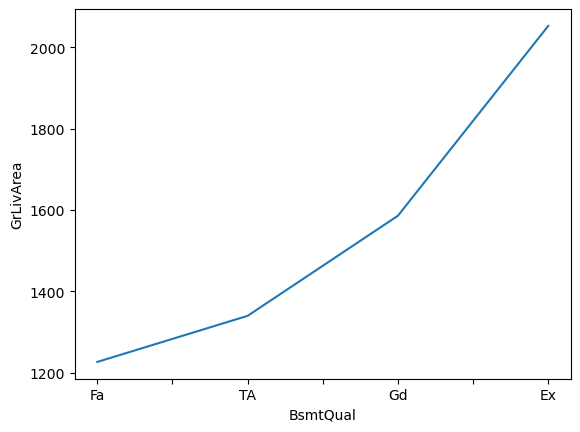

In [60]:
df.groupby('BsmtQual')['GrLivArea'].mean().sort_values().plot()
plt.ylabel('GrLivArea')
plt.show()

BsmtQual의 두 결측치는 Fa나 TA일 것으로 예상된다.

In [61]:
df.loc[(df.BsmtQual.isna()&~df.BsmtCond.isna()&~df.BsmtExposure.isna()), ['BsmtQual', 'GrLivArea']]

,BsmtQual,GrLivArea
757,NaN,1361
758,NaN,1049


BsmtExposure, BsmtCond와의 관계도 살펴보자.

In [62]:
df.loc[(df.BsmtQual.isna()&~df.BsmtCond.isna()&~df.BsmtExposure.isna()), ['Id', 'BsmtQual', 'BsmtExposure', 'BsmtCond']]

,Id,BsmtQual,BsmtExposure,BsmtCond
757,2218,NaN,No,Fa
758,2219,NaN,No,TA


두 값들과 비교해보니 Id 2218 같은 경우는 TA, Fa, Gd 순으로 값이 많았고 Id 2219는 TA, Gd, Ex, Fa순으로 값이 많은 것을 확인할 수 있었다.

In [63]:
df.loc[:, ['BsmtExposure', 'BsmtCond', 'BsmtQual']].value_counts(sort=False)

BsmtExposure  BsmtCond  BsmtQual
Av            Fa        Gd            2
                        TA            1
              Gd        Ex            5
                        Gd           12
                        TA            4
              TA        Ex           57
                        Gd          247
                        TA           90
Gd            Fa        TA            1
              Gd        Ex            3
                        Gd           14
                        TA            6
              Po        Fa            1
              TA        Ex           88
                        Fa            1
                        Gd          125
                        TA           37
Mn            Fa        Fa            3
                        Gd            1
                        TA            6
              Gd        Ex            1
                        Fa            1
                        Gd            7
                        TA            3
       

위에서 나온 결론을 종합해 해당 변수의 두 결측치는 TA로 채우기로 결정했다.

In [64]:
df.loc[(df.BsmtQual.isna()&~df.BsmtCond.isna()&~df.BsmtExposure.isna()), 'BsmtQual'] = 'TA'

이제 남은 값들은 실제로 지하실이 없는 값들이므로 범주형은 None, 수치형은 0.0으로 대치해서 마무리했다.

In [65]:
df.loc[(df.BsmtQual.isna()|df.BsmtCond.isna()|df.BsmtExposure.isna()|df.BsmtFinType1.isna()|df.BsmtFinSF1.isna()|df.BsmtFinType2.isna()|df.BsmtFinSF2.isna()|df.BsmtUnfSF.isna()|df.TotalBsmtSF.isna()|df.BsmtFullBath.isna()|df.BsmtHalfBath.isna()), 
       ['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,18,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,40,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,91,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,103,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,157,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
182,183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
259,260,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
342,343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362,363,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
371,372,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [66]:
df.loc[:, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df.loc[:, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

In [67]:
df.loc[:, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = df.loc[:, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [68]:
df.loc[(df.BsmtQual.isna()|df.BsmtCond.isna()|df.BsmtExposure.isna()|df.BsmtFinType1.isna()|df.BsmtFinSF1.isna()|df.BsmtFinType2.isna()|df.BsmtFinSF2.isna()|df.BsmtUnfSF.isna()|df.TotalBsmtSF.isna()|df.BsmtFullBath.isna()|df.BsmtHalfBath.isna()), 
       ['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]

,Id,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath


### Garage...

남은 변수들 중에서 이번에는 Garage에 관련된 변수를 살펴보려고 한다.

In [69]:
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Utilities          2
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

관련 변수중에 결측치가 있는 값들을 확인해봤다.

In [70]:
df.loc[df.GarageYrBlt.isna(), ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 
           'GarageArea', 'GarageQual', 'GarageCond']].isna().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

Id 2127과 2577번은 GarageType 값은 존재하지만 나머지 값은 비어있는 것을 확인할 수 있다.

그러므로 주차장은 존재하지만 나머지 데이터에 결측치가 생긴 것을 알 수 있다.

In [71]:
df.loc[df.GarageYrBlt.isna(), ['Id', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 
           'GarageArea', 'GarageQual', 'GarageCond']]

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,40,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,90,NaN,NaN,NaN,0.0,0.0,NaN,NaN
99,100,NaN,NaN,NaN,0.0,0.0,NaN,NaN
108,109,NaN,NaN,NaN,0.0,0.0,NaN,NaN
125,126,NaN,NaN,NaN,0.0,0.0,NaN,NaN
127,128,NaN,NaN,NaN,0.0,0.0,NaN,NaN
140,141,NaN,NaN,NaN,0.0,0.0,NaN,NaN


우선 2127과 2577의 결측값들을 추측해보자.

In [72]:
df[(df.Id == 2127) | (df.Id == 2577)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,None,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,None,MnPrv,Shed,1000,9,2008,WD,Normal,NaN
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca,NaN


우선 GarageYrBlt(주차장 건설 날짜)는 YearBuilt(주택 건설 날짜)나 YearRemodAdd(주택 리모델링 날짜)와 관련이 있을 것 같다.

GarageFinish(차고 마감 상태)와 GarageQual(차고 품질), 그리고 GarageCond(차고 상태)는 서로 연관이 있을 것 같아 주택의 상태와 관련된 변수들과 비교해보기로 했다.

마지막으로 GarageCars와 GarageArea는 위의 결측치를 채운 값들을 토대로 예측해보려고 한다.

우선 1930년 이전에 지어진 주택중에 리모델링이 80년대 이후에 진행된 주택 중에 주차장이 존재하는 주택의 주차장 건설 날짜를 보겠다.

데이터를 살펴보면 주차장이 건설된 시기는 크게 주택이 지어질 때와 주택이 리모델링 될 때, 그리고 지어지고 리모델링이 된 사이로 나뉘었다.

그래서 위의 세 가지 경우의 수중에 어떤 경우가 많은지 알아보기로 했다.

In [73]:
garageyrblt = df.loc[(df.YearBuilt<1930) & (df.YearRemodAdd>1980) & (~df.GarageYrBlt.isna()), ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
garageyrblt

,YearBuilt,YearRemodAdd,GarageYrBlt
15,1929,2001,1991.0
61,1920,1996,1935.0
79,1910,1981,1966.0
92,1921,2006,1921.0
93,1910,1998,1900.0
106,1885,1995,1954.0
164,1926,2004,1926.0
179,1923,2006,1935.0
184,1908,1991,1986.0
185,1892,1993,1993.0


주택 건설시 주차장이 지어진 경우

In [74]:
(garageyrblt.GarageYrBlt == garageyrblt.YearBuilt).sum() # 

45

리모델링 시 주차징이 지어진 경우

In [75]:
(garageyrblt.GarageYrBlt == garageyrblt.YearRemodAdd).sum()

5

주택 건설 시기와 리모델링 시기 사이에 주차장이 지어진 경우

In [76]:
((garageyrblt.YearBuilt <= garageyrblt.GarageYrBlt) & (garageyrblt.GarageYrBlt <= garageyrblt.YearRemodAdd)).sum()

115

나머지 경우(주차장이 주택보다 일찍 지어졌거나 리모델링 이후 주차장이 지어진 경우)

In [77]:
((garageyrblt.YearBuilt > garageyrblt.GarageYrBlt) | (garageyrblt.GarageYrBlt > garageyrblt.YearRemodAdd)).sum()

13

결과적으로 주택 건설과 리모델링 시기 사이에 주차장이 건설 된 경우가 가장 많았다.

그러므로 해당 조건을 주택 외부에 주차장이 지어진 경우와 묶어 평균을 알아본 후 결측값에 적용해주겠다.

주택 외부에 건설된 주차장의 평균 건설 시기

In [78]:
df.loc[df.GarageType == 'Detchd', 'GarageYrBlt'].mean()//1

1961.0

복합 조건이 적용된 외부 주차장의 평균 건설 시기

In [79]:
yr_blt = df.loc[(df.GarageType == 'Detchd') & ((df.YearBuilt <= df.GarageYrBlt) & (df.GarageYrBlt <= df.YearRemodAdd)), 'GarageYrBlt'].mean()//1
yr_blt

1954.0

GarageYrBlt 결측값 대체

In [80]:
df.loc[(df.Id == 2127) | (df.Id == 2577), 'GarageYrBlt'] = yr_blt

이제 GarageFinish(차고 마감 상태), GarageQual(차고 품질), GarageCond(차고 상태) 값들을 살펴보자.

In [81]:
df.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [82]:
df.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [83]:
df.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

각 변수들의 구셩 값을 살펴보니 GarageQual과 GarageCond는 TA값이 다른 값보다 압도적으로 많아 TA로 적용해주기로 했다.

In [84]:
df.loc[(df.Id == 2127) | (df.Id == 2577), ['GarageQual', 'GarageCond']] = df.loc[(df.Id == 2127) | (df.Id == 2577), ['GarageQual', 'GarageCond']].fillna('TA')

GarageFinish 변수는 OverallQual과 상관관계를 비교해보기로 했다.

GarageType이 Detchd인 값들의 OverallQual에 따른 GarageFinish를 살펴보자.

In [85]:
df.loc[(df.GarageType == 'Detchd'), ['OverallQual', 'GarageFinish']].value_counts(sort=False)

OverallQual  GarageFinish
2            Unf              10
3            RFn               1
             Unf              19
4            Fin               3
             RFn               6
             Unf              99
5            Fin              11
             RFn               8
             Unf             326
6            Fin               6
             RFn               6
             Unf             192
7            Fin               3
             RFn              13
             Unf              58
8            Fin               1
             Unf              13
10           Unf               2
dtype: int64

우리가 찾던 결측치 2개의 OverallQual 값은 각각 8과 6이였으니 그에 맞는 최빈값인 Unf로 GarageFinish 결측치를 대체해주자.

In [86]:
df.loc[(df.Id == 2127) | (df.Id == 2577), 'GarageFinish'] = 'Unf'

In [87]:
df.loc[(df.Id == 2127) | (df.Id == 2577)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,None,Detchd,1954.0,Unf,1.0,360.0,TA,TA,Y,64,0,180,0,0,0,None,MnPrv,Shed,1000,9,2008,WD,Normal,NaN
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1954.0,Unf,NaN,NaN,TA,TA,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca,NaN


마지막으로 Id 2577의 GarageCars와 GarageArea의 결측치를 채워주겠다.

우선 GarageCars를 추측하고 그에 맞는 GarageArea를 구해보려고 한다.

GarageCars는 BldgType(주거 유형)과 관련이 있을 것 같아 GarageType이 Detchd인 경우 두 변수를 비교해봤더니 1Fam(단독주택)인 경우는 1대가 가장 많았으므로 1로 결측치를 채워주겠다.

In [88]:
df.loc[(df.GarageType == 'Detchd'), ['BldgType', 'GarageCars']].value_counts(sort=False)

BldgType  GarageCars
1Fam      1.0           342
          2.0           284
          3.0            10
          4.0             3
          5.0             1
2fmCon    1.0             9
          2.0            16
Duplex    1.0             2
          2.0            33
          3.0             3
          4.0             1
Twnhs     1.0            22
          2.0            24
TwnhsE    1.0             1
          2.0            27
dtype: int64

In [89]:
df.loc[(df.Id == 2577), 'GarageCars'] = 1

그리고 GarageCars이 1인 경우 GarageArea는 평균 300의 크기를 가지고 있으므로 300으로 결측치를 채워주겠다.

In [90]:
df.loc[df.GarageCars == 1, 'GarageArea'].mean()//1

300.0

In [91]:
df.loc[(df.Id == 2577), 'GarageArea'] = 300

이제 Garage관련 남은 결측값들은 범주형은 None으로, 수치형은 0으로 대체해주면 끝이다.

In [92]:
df.loc[:, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df.loc[:, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

In [93]:
df.loc[:, ['GarageYrBlt', 'GarageCars', 'GarageArea']] = df.loc[:, ['GarageYrBlt', 'GarageCars', 'GarageArea']].fillna(0)

### 남은 변수들

In [94]:
df.isna().sum()[df.isna().sum()>0]

MSZoning          4
LotFrontage     486
Utilities         2
Electrical        1
KitchenQual       1
Functional        2
SaleType          1
SalePrice      1459
dtype: int64

MSZoning을 채워보자. 이 변수는 주택의 구역 분류를 나타낸다.

In [95]:
df[df.MSZoning.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,NaN,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,None,None,None,0,5,2006,WD,Normal,NaN


MSSubClass 변수와 연관이 있을 것 같아 살펴보았다.

MSSubClass이 20인 값들은 최빈값인 RL이 압도적으로 많으므로 RL로 대체할 것이다.

In [96]:
df.loc[:, ['MSSubClass', 'MSZoning']].value_counts(sort=False)

MSSubClass  MSZoning
20          C (all)        3
            FV            34
            RH             4
            RL          1016
            RM            20
30          C (all)        8
            RH             2
            RL            61
            RM            67
40          RL             4
            RM             2
45          RH             1
            RL             6
            RM            11
50          C (all)        7
            RH             2
            RL           159
            RM           119
60          FV            43
            RL           529
            RM             3
70          C (all)        4
            RH             3
            RL            57
            RM            63
75          RL             9
            RM            14
80          RL           115
            RM             3
85          RL            47
            RM             1
90          RH             4
            RL            92
            RM        

In [97]:
df.loc[(df.MSZoning.isna()) & (df.MSSubClass == 20), 'MSZoning'] = 'RL'

나머지 두 값들은 30과 70인데 모두 45년 이전 건물로 1층과 2층이라는 차이가 있다.

MSZoning의 값 전체로 보면 RL이 RM보다 약 5배 이상 압도적으로 많은데 30과 70에서는 RM이 약간 많은 것으로 보아 45년 이전에는 RM의 비중이 많이 높은 것을 확인할 수 있다.

따라서 두 값들은 RM으로 대치해주겠다.

In [98]:
df.MSZoning.value_counts()

RL         2267
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [99]:
df.loc[df.MSZoning.isna(), 'MSZoning'] = 'RM'

Utilities를 확인해보자. Utilities는 사용 가능한 유틸리티의 유형이다.

In [100]:
df[df.Utilities.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,RM,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal,NaN
485,1946,20,RL,NaN,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,None,Shed,750,5,2008,WD,Normal,NaN


한 값을 제외하고 모두 AllPub이므로 AllPub로 결측치를 채워주겠다.

In [101]:
df.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [102]:
df.loc[df.Utilities.isna(), 'Utilities'] = 'AllPub'

Electrical도 살펴보자.

In [103]:
df[df.Electrical.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500.0


In [104]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

2000년대 이후에 지어진 주택의 Electrical를 확인해보니 모두 SBrkr임을 확인할 수 있었다. 따라서 해당 값은 SBrkr로 대체한다.

In [105]:
df.loc[df.YearBuilt>=2000, ['Electrical', 'YearBuilt']].value_counts(sort=False)

Electrical  YearBuilt
SBrkr       2000          48
            2001          35
            2002          47
            2003          88
            2004          99
            2005         142
            2006         137
            2007         109
            2008          49
            2009          25
            2010           3
dtype: int64

In [106]:
df.loc[df.Electrical.isna(), 'Electrical'] = 'SBrkr'

KitchenQual은 주방 퀄리티에 관한 변수이다.

In [107]:
df[df.KitchenQual.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal,NaN


TA와 Gd중에 하나를 선택하면 될듯 하다.

In [108]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

TA와 GD의 수가 비슷한데, 주방이 두개가 되니 Gd 5개에 TA 115개로 Gd의 비중이 확 줄어드는 것을 확인할 수 있다.

그래서 주방이 한 개일때 Gd일 확률이 조금 더 높다고 생각해 Gd로 대체해주겠다.

In [109]:
df.loc[:, ['KitchenAbvGr', 'KitchenQual']].value_counts(sort=False)

KitchenAbvGr  KitchenQual
0             TA                3
1             Ex              205
              Fa               61
              Gd             1146
              TA             1372
2             Fa                9
              Gd                5
              TA              115
3             TA                2
dtype: int64

In [110]:
df.loc[df.KitchenQual.isna(), 'KitchenQual'] = 'Gd'

Functional은 Typ의 비중이 압도적으로 높아 해당 변수의 결측치를 Typ로 대체해주겠다.

In [111]:
df.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [112]:
df.loc[df.Functional.isna(), 'Functional'] = 'Typ'

마지막으로 SaleType을 살펴보자. 이 값도 WD의 비중이 높으니 WD로 대체해주겠다.

In [113]:
df.loc[df.SaleType.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1029,2490,20,RL,85.0,13770,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2007,NaN,Normal,NaN


In [114]:
df.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [115]:
df.loc[df.SaleType.isna(), 'SaleType'] = 'WD'

마무리가 잘 되었는지 확인하자.

In [116]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage     486
SalePrice      1459
dtype: int64

In [117]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [118]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,None,None,None,0,11,2006,WD,Normal,NaN


# 전처리

우선 LotFrontage의 결측치를 예측하는 간단한 선형 모델을 만들어보자.

LotFrontage가 있는 데이터는 학습 데이터, 없는 데이터는 테스트 데이터로 나눈다.

In [119]:
temp_df = df.copy()
temp_df = temp_df.drop('SalePrice', axis=1)

간단한 전처리
- 범주형 -> 수치형 인코딩
- 스케일링

트리계열을 제외한 ML 알고리즘에서는 LabelEncoder를 잘 사용하지 않음

In [120]:
categorical_columns = list(set(temp_df.columns.tolist())-set(temp_df.describe().columns.tolist()))

In [121]:
temp_df_cte = temp_df.loc[:, categorical_columns]
temp_df_num = temp_df.drop(categorical_columns, axis=1)

In [122]:
temp_df_cte = pd.get_dummies(temp_df_cte)

In [123]:
temp_df_encoded = pd.concat([temp_df_num, temp_df_cte], axis=1)

트테 나누기

In [124]:
temp_train = temp_df_encoded[~temp_df_encoded.LotFrontage.isna()]
temp_test = temp_df_encoded[temp_df_encoded.LotFrontage.isna()]

In [125]:
temp_test.shape

(486, 303)

In [126]:
temp_train_X, temp_train_y = temp_train.drop(columns=['Id', 'LotFrontage']), temp_train.LotFrontage
temp_test_X = temp_test.drop(columns=['Id', 'LotFrontage'])

스케일링

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_train_X = scaler.fit_transform(temp_train_X)
temp_test_X = scaler.transform(temp_test_X)

LotFrontage를 예측하는 선형 모델 학습

In [128]:
from sklearn.linear_model import LinearRegression

temp_lr = LinearRegression()
temp_lr.fit(temp_train_X, temp_train_y)
temp_pred = temp_lr.predict(temp_test_X)
temp_pred.shape

(486,)

원본 데이터프레임의 결측치로 대체

In [129]:
df.loc[df.LotFrontage.isna(), ['LotFrontage']] = temp_pred

In [130]:
df.LotFrontage.isna().sum()

0

## 사용하지 않는 열 삭제

In [131]:
df = df.drop('Id', axis=1)

## 범주형 변수 인코딩

In [132]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [133]:
categorical_columns = list(set(df.columns.tolist())-set(df.describe().columns.tolist()))

df_cte = df.loc[:, categorical_columns]
df_num = df.drop(categorical_columns, axis=1)

df_cte = pd.get_dummies(df_cte)
df_encoded = pd.concat([df_num, df_cte], axis=1)

# 모델링

## 데이터 split

In [134]:
train = df_encoded[:num_train]
test = df_encoded[num_train:]

In [135]:
train.SalePrice.isna().sum()

0

In [136]:
train_X, train_y = train.drop('SalePrice', axis=1), train.SalePrice
test_X = test.drop('SalePrice', axis=1)

In [137]:
train_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFi

In [138]:
train_y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [139]:
test_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFi

## 스케일링

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [141]:
scaled_train_X = pd.DataFrame(scaled_train_X, columns=train_X.columns)
scaled_test_X = pd.DataFrame(scaled_test_X, columns=test_X.columns)

## 모델 import

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.metrics import mean_squared_error

## 모델 학습

In [143]:
random_state = 42
cv_num = 3

In [144]:
models = {
    # 'lr' : LinearRegression(), # 수치 이상함..
    # 'knn' : KNeighborsRegressor(),
    'tree' : DecisionTreeRegressor(random_state=random_state),
    # 'bag' : BaggingRegressor(random_state=random_state),
    'forest' : RandomForestRegressor(random_state=random_state),
    'ada' : AdaBoostRegressor(random_state=random_state),
    'gbc' : GradientBoostingRegressor(random_state=random_state),
    'xgb' : XGBRegressor(random_state=random_state),
    'lgbm' : LGBMRegressor(random_state=random_state),
    'cat' : CatBoostRegressor(random_state=random_state, verbose=False, allow_writing_files=False),
}

scores = {}

for name, model in models.items():
    model.fit(scaled_train_X, train_y)
    acc = cross_val_score(model, scaled_train_X, train_y, scoring = "neg_root_mean_squared_error", cv = cv_num, n_jobs=-1)
    scores[name] = acc

cross_val_score의 scoring=neg_...는 값이 음수로 나옴

In [145]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df

,0,1,2,mean
cat,-21464.443201,-29607.425085,-25318.885834,-25463.584706
gbc,-23273.550201,-30379.147144,-27821.055185,-27157.917510
lgbm,-24282.782479,-30345.122324,-30919.203574,-28515.702793
xgb,-26693.253739,-34694.572101,-28327.221778,-29905.015873
forest,-26517.531271,-31725.151342,-32636.781583,-30293.154732
ada,-31196.671746,-37437.820449,-39213.119928,-35949.204041
tree,-37242.919168,-39266.999896,-50354.442015,-42288.120360


Text(0.5, 0, 'RMSE Score')

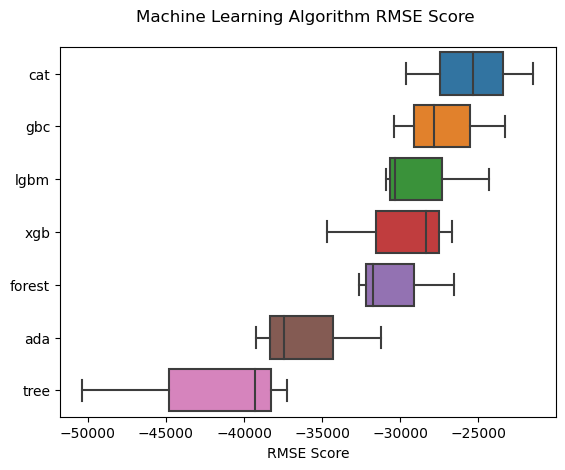

In [146]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm RMSE Score \n')
plt.xlabel('RMSE Score')

LinearRegression은 교차 검증시 값이 너무 커지는 에러가 난다.. scoring 함수가 문제인듯

In [147]:
# temp_lr = LinearRegression()
# # temp_lr.fit(train_X, train_y)
# np.sqrt(-1*cross_val_score(temp_lr, train_X, train_y, scoring = "neg_root_mean_squared_error", cv = cv_num))

그냥은 또 제대로 된다...

In [148]:
# temp_lr = LinearRegression()
# temp_lr.fit(train_X, train_y)
# temp_pred = temp_lr.predict(train_X)
# mean_squared_error(train_y, temp_pred)**0.5

## 차원축소

### Feature Selection

In [149]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [150]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':scaled_train_X.columns.tolist(), 'Importance':models.get('xgb').feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

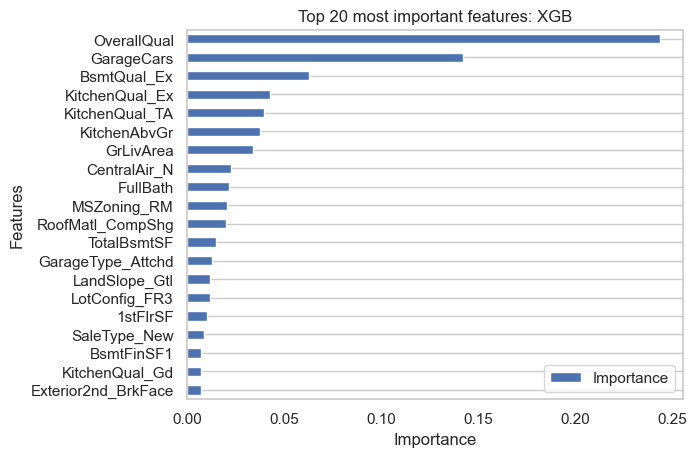

In [151]:
# 그래프 제목
title = 'Top 20 most important features: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [152]:
# 모델들에 대한 항목 중요도 얻기
cat_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'cat importance':models.get('cat').feature_importances_})
gbc_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'gbc importance':models.get('gbc').feature_importances_})
lgbm_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'lgbm importance':models.get('lgbm').feature_importances_})
xgb_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'xgb importance':models.get('xgb').feature_importances_})
forest_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'forest importance':models.get('forest').feature_importances_})
ada_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'ada importance':models.get('ada').feature_importances_})
tree_imp = pd.DataFrame({'Feature':scaled_train_X.columns, 'tree importance':models.get('tree').feature_importances_})

# 하나의 데이터프레임으로
importances = cat_imp.merge(gbc_imp, on='Feature').merge(lgbm_imp, on='Feature').merge(xgb_imp, on='Feature').merge(forest_imp, on='Feature').merge(ada_imp, on='Feature').merge(tree_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

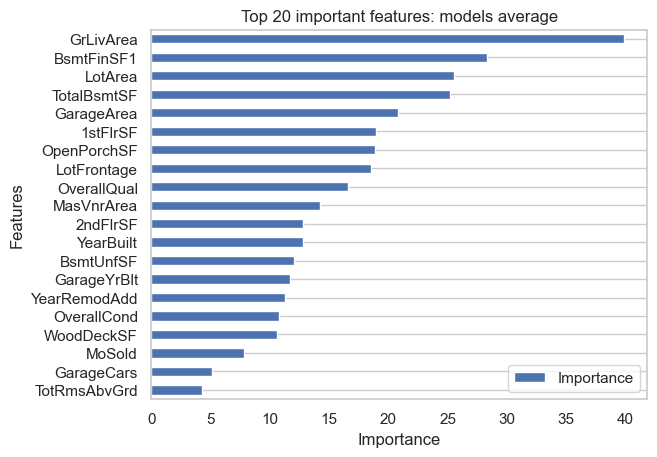

In [153]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features: models average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

90% 데이터만 활용

In [154]:
-(importance.shape[0]*0.9)

-271.8

In [155]:
importance1 = importance[-272:]
arr = list(importance1.index)

In [156]:
fs_train_X = scaled_train_X.loc[:, arr]
fs_test_X = scaled_test_X.loc[:, arr]

### Feature Selection 데이터 학습

피쳐 다 쓰는게 성능 살짝 더 좋음

In [157]:
# models2 = {
#     # 'lr' : LinearRegression(),
#     # 'knn' : KNeighborsRegressor(),
#     'tree' : DecisionTreeRegressor(random_state=random_state),
#     # 'bag' : BaggingRegressor(random_state=random_state),
#     'forest' : RandomForestRegressor(random_state=random_state),
#     'ada' : AdaBoostRegressor(random_state=random_state),
#     'gbc' : GradientBoostingRegressor(random_state=random_state),
#     'xgb' : XGBRegressor(random_state=random_state),
#     'lgbm' : LGBMRegressor(random_state=random_state),
#     'cat' : CatBoostRegressor(random_state=random_state, verbose=False, allow_writing_files=False),
# }

# scores = {}

# for name, model in models2.items():
#     model.fit(fs_train_X, train_y)
#     acc = cross_val_score(model, fs_train_X, train_y, scoring = "neg_root_mean_squared_error", cv = cv_num, n_jobs=-1)
#     scores[name] = acc

In [158]:
# results = pd.DataFrame(scores).T
# results['mean'] = results.mean(1)

# result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
# result_df

In [159]:
# result_df = result_df.drop(['mean'], axis=1)
# sns.boxplot(data=result_df.T, orient='h')
# plt.title('Machine Learning Algorithm RMSE Score \n')
# plt.xlabel('RMSE Score')

### PCA

In [160]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_X)

PCA()

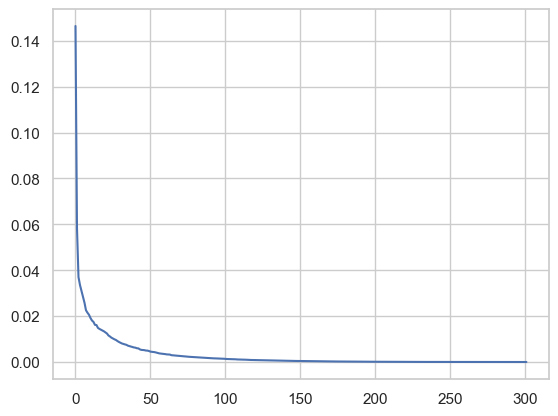

In [161]:
plt.plot(pca.explained_variance_ratio_)

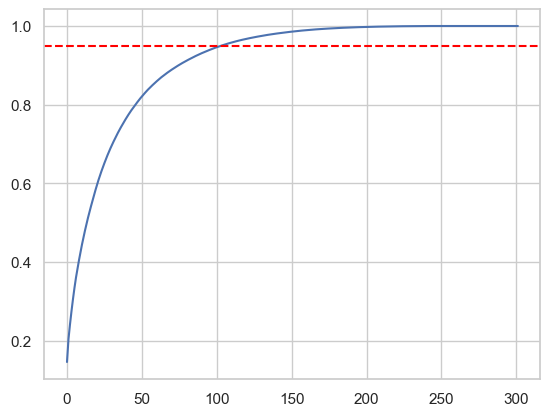

In [162]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.95, color="red", linestyle="--")

In [163]:
pca = PCA(n_components=0.95)
pca_train_X = pca.fit_transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)

In [164]:
pca.n_components_

104

In [165]:
# # No PCA
# pca_train_X = scaled_train_X
# pca_test_X = scaled_test_X

### PCA 데이터 학습

feature는 줄었는데 시간이 훨씬 오래걸림.. 성능도 감소

In [166]:
# models3 = {
#     # 'lr' : LinearRegression(),
#     # 'knn' : KNeighborsRegressor(),
#     'tree' : DecisionTreeRegressor(random_state=random_state),
#     # 'bag' : BaggingRegressor(random_state=random_state),
#     'forest' : RandomForestRegressor(random_state=random_state),
#     'ada' : AdaBoostRegressor(random_state=random_state),
#     'gbc' : GradientBoostingRegressor(random_state=random_state),
#     'xgb' : XGBRegressor(random_state=random_state),
#     'lgbm' : LGBMRegressor(random_state=random_state),
#     'cat' : CatBoostRegressor(random_state=random_state, verbose=False, allow_writing_files=False),
# }

# scores = {}

# for name, model in models3.items():
#     model.fit(pca_train_X, train_y)
#     acc = cross_val_score(model, pca_train_X, train_y, scoring = "neg_root_mean_squared_error", cv = cv_num, n_jobs=-1)
#     scores[name] = acc

In [167]:
# results = pd.DataFrame(scores).T
# results['mean'] = results.mean(1)

# result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
# result_df

In [168]:
# result_df = result_df.drop(['mean'], axis=1)
# sns.boxplot(data=result_df.T, orient='h')
# plt.title('Machine Learning Algorithm RMSE Score \n')
# plt.xlabel('RMSE Score')

scaled data와 pca data 성능 테스트

PCA를 한 후에 시간이 더 오래 걸릴 수도 있음

In [169]:
# temp_gbc = GradientBoostingRegressor(random_state=random_state)

# temp_gbc.fit(scaled_train_X, train_y) # scaled
# temp_gbc_pred = temp_gbc.predict(scaled_train_X)
# scaled_pred = mean_squared_error(train_y, temp_gbc_pred, squared=False)

# print(scaled_pred)

In [170]:
# temp_gbc = GradientBoostingRegressor(random_state=random_state)

# temp_gbc.fit(pca_train_X, train_y) # pca
# temp_gbc_pred = temp_gbc.predict(pca_train_X)
# pca_pred = mean_squared_error(train_y, temp_gbc_pred, squared=False)

# print(pca_pred)

## 하이퍼 파라미터 튜닝

In [171]:
import optuna

In [172]:
# # example
# def objective(trial):
#     optimizer = trial.suggest_categorical("optimizer", ["MomentumSGD", "Adam"])   # Categorical parameter
#     num_layers = trial.suggest_int("num_layers", 1, 3)                            # Integer parameter
#     num_channels = trial.suggest_int("num_channels", 32, 512, log=True)           # Integer parameter (log)
#     num_units = trial.suggest_int("num_units", 10, 100, step=5)                   # Integer parameter (discretized)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 1.0)                  # Floating point parameter
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)    # Floating point parameter (log)
#     drop_path_rate = trial.suggest_float("drop_path_rate", 0.0, 1.0, step=0.1)    # Floating point parameter (discretized)

In [173]:
# cv_num = 5

In [174]:
def objective(trial, name):
    if name == 'tree':
        param = {
            'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error']),
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
            'min_samples_leaf': 1,
            'max_features': trial.suggest_categorical('max_features', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'max_leaf_nodes': None,
            'random_state': random_state,
        }
        model = DecisionTreeRegressor(**param)
    elif name == 'forest':
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 500, step=10),
            'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error']),
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
            'min_samples_leaf': 1,
            'max_features': trial.suggest_categorical('max_features', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'max_leaf_nodes': None,
            'max_samples': trial.suggest_categorical('max_samples', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
           
            'random_state': random_state,
        }
        model = RandomForestRegressor(**param)
    elif name == 'ada':
        param = {
            'estimator': None,
            'n_estimators': trial.suggest_int('n_estimators', 10, 500, step=10),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
            'loss': trial.suggest_categorical('loss', ['linear', 'square']),
            'random_state': random_state
        }
        model = AdaBoostRegressor(**param)
    elif name == 'gbc':
        param = {
            'loss': trial.suggest_categorical('loss', ['squared_error', 'absolute_error']),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 10, 500, step=10),
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
            'min_samples_leaf': 1,
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'max_features': trial.suggest_categorical('max_features', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'max_leaf_nodes': None,
            'random_state': random_state,
        }
        model = GradientBoostingRegressor(**param)
    elif name == 'xgb':
        param = {
            # 'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
            # 'booster': None,
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
            'gamma': trial.suggest_float('gamma', 0.001, 10.0),
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'min_child_weight': 1,
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            # 'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0),
            # 'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0),
            # 'scale_pos_weight': None,
            # 'objective': 'reg:squarederror',
            # 'eval_metric': None,
            'n_estimators': trial.suggest_int('n_estimators', 10, 500, step=10),
            'random_state': random_state,
        }
        model = XGBRegressor(**param)
    elif name == 'lgbm':
        param = {
            # 'objective': None,
            # 'boosting_type': 'gbdt',
            # 'n_estimators': trial.suggest_int('n_estimators', 10, 500, step=10),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
            'max_depth': trial.suggest_int('max_depth', 2, 20),
            'min_child_samples': 1,
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            # 'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0),
            # 'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0),
            'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
            'random_state': random_state,
        }
        model = LGBMRegressor(**param)
    elif name == 'cat':
        param = {
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.01),
            'max_depth': trial.suggest_int('max_depth', 6, 10),
            "n_estimators":trial.suggest_int("n_estimators", 100, 4000, step=100),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 2, 10),
            'random_strength': trial.suggest_float('random_strength', 0, 10.0),
            'random_state': random_state,
            'allow_writing_files': False,
            'verbose': False,
        }
        model = CatBoostRegressor(**param)

    score = cross_val_score(model, scaled_train_X, train_y, scoring='neg_root_mean_squared_error', cv=cv_num, n_jobs=-1)
    return score.mean()

In [175]:
def study(name, n_trials):
    study = optuna.create_study(direction='maximize') # rmse 값이 음수로 나와서 maximize로 지정, 원래는 minimize
    study.optimize(lambda trial : objective(trial, name), n_trials=n_trials)

    print(f'Best score: {study.best_trial.value},\nBest params: {study.best_trial.params}')

    display(optuna.visualization.plot_param_importances(study))
    display(optuna.visualization.plot_optimization_history(study))

In [176]:
n_trials = 100

tree

In [177]:
# study('tree', n_trials)

forest

In [178]:
# study('forest', n_trials)

ada

In [179]:
# study('ada', n_trials)

gbc

In [180]:
# study('gbc', n_trials)

xgb

In [181]:
# study('xgb', n_trials)

lgbm

In [182]:
# study('lgbm', n_trials)

cat

In [183]:
# study('cat', n_trials)

## 튜닝 모델 재학습

In [184]:
sdfasfsf

NameError: name 'sdfasfsf' is not defined

In [ ]:
models4 = {
    # 'lr' : LinearRegression(),
    # 'knn' : KNeighborsRegressor(),
    # 'tree' : DecisionTreeRegressor(criterion= 'squared_error', max_depth= 20, min_samples_split= 36, max_features= 0.9, random_state=random_state),
    # 'bag' : BaggingRegressor(random_state=random_state),
    # 'forest' : RandomForestRegressor(n_estimators= 220, criterion= 'squared_error', max_depth= 18, min_samples_split= 3, max_features= 0.3, max_samples= 0.8, random_state=random_state),
    # 'ada' : AdaBoostRegressor(n_estimators= 220, learning_rate= 0.17551906180836557, loss= 'linear', random_state=random_state),
    # 'gbc' : GradientBoostingRegressor(loss= 'squared_error', learning_rate= 0.033097966576028974, n_estimators= 460, subsample= 0.7, min_samples_split= 39, max_depth= 10, max_features= 0.3, random_state=random_state),
    # 'xgb' : XGBRegressor(min_child_weight= 0.4871779153736783, subsample= 0.6, reg_alpha= 504.4494938365032, n_estimators= 190, eta= 0.17600777596228487, random_state=random_state),
    # 'lgbm' : LGBMRegressor(learning_rate= 0.009776891479154675, max_depth= 40, num_leaves= 48, feature_fraction= 0.9796411251891587, bagging_fraction= 0.9332893508724557, bagging_freq= 8, min_data_in_leaf= 10, random_state=random_state),
    'cat' : CatBoostRegressor(learning_rate= 0.0085, max_depth= 6, n_estimators= 4000, l2_leaf_reg= 2, random_strength= 0.28, random_state=random_state, verbose=False, allow_writing_files=False),
}

scores = {}

for name, model in models4.items():
    model.fit(scaled_train_X, train_y)
    acc = cross_val_score(model, scaled_train_X, train_y, scoring = "neg_root_mean_squared_error", cv = cv_num, n_jobs=-1)
    scores[name] = acc

Text(0.5, 0, 'Accuracy Score (%)')

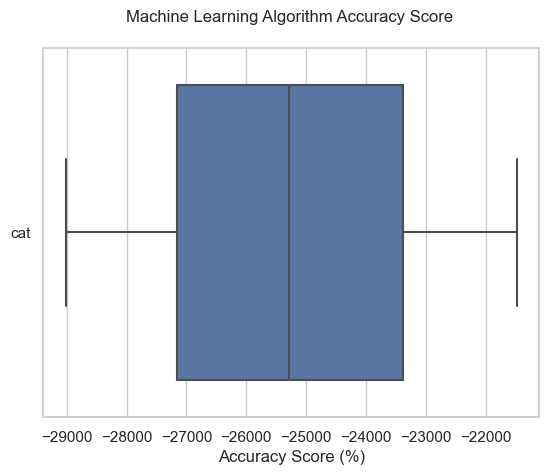

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)

result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

## Bagging -> Voting

In [ ]:
# grid = VotingRegressor(estimators = list(models4.items()))

# # grid_cv = model_selection.cross_validate(grid, scaled_train_X, train_y, scoring='neg_root_mean_squared_error', cv=cv_num)
# grid.fit(scaled_train_X, train_y)

# # print("Hard voting on test set score mean: {:.2f}". format(grid_cv['test_score'].mean()))

VotingRegressor(estimators=[('tree',
                             DecisionTreeRegressor(max_depth=20,
                                                   max_features=0.9,
                                                   min_samples_split=36,
                                                   random_state=42)),
                            ('forest',
                             RandomForestRegressor(max_depth=18,
                                                   max_features=0.3,
                                                   max_samples=0.8,
                                                   min_samples_split=3,
                                                   n_estimators=220,
                                                   random_state=42)),
                            ('ada',
                             AdaBoostRegressor(learning_rate=0.17551906180836557,
                                               n_estimators=220,
                                               random_state=4...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=300, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...)),
                            ('lgbm',
                             LGBMRegressor(colsample_bytree=0.9,
                                           learning_rate=0.09712484975136734,
                                           max_depth=2, n_estimators=500,
                                           random_state=42, subsample=0.6)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x00000187DEC9B0D0>)])

## Stacking

In [ ]:
stack = StackingRegressor(estimators=list(models.items()),
                           final_estimator=LinearRegression(),
                           cv=cv_num)

# stack_cv = cross_val_score(stack, scaled_train_X, train_y, scoring='neg_root_mean_squared_error', cv=cv_num)
stack.fit(scaled_train_X, train_y)

# print("Stacking on test set score mean: {:.2f}". format(stack_cv.mean()))

StackingRegressor(cv=3,
                  estimators=[('tree', DecisionTreeRegressor(random_state=42)),
                              ('forest',
                               RandomForestRegressor(random_state=42)),
                              ('ada', AdaBoostRegressor(random_state=42)),
                              ('gbc',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytr...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x00000187D1207910>)],
                  final_estimator=LinearRegression())

In [ ]:
stack2 = StackingRegressor(estimators=list(models4.items()),
                           final_estimator=LinearRegression(),
                           cv=cv_num)

# stack_cv = cross_val_score(stack, scaled_train_X, train_y, scoring='neg_root_mean_squared_error', cv=cv_num)
stack2.fit(scaled_train_X, train_y)

# print("Stacking on test set score mean: {:.2f}". format(stack_cv.mean()))

StackingRegressor(cv=3,
                  estimators=[('tree',
                               DecisionTreeRegressor(max_depth=20,
                                                     max_features=0.9,
                                                     min_samples_split=36,
                                                     random_state=42)),
                              ('forest',
                               RandomForestRegressor(max_depth=18,
                                                     max_features=0.3,
                                                     max_samples=0.8,
                                                     min_samples_split=3,
                                                     n_estimators=220,
                                                     random_state=42)),
                              ('ada',
                               AdaBoostRegressor(learning_rate=0.17551906180836557,
                                                 n_estimators=220,
                                                 random_...
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.9,
                                             learning_rate=0.09712484975136734,
                                             max_depth=2, n_estimators=500,
                                             random_state=42, subsample=0.6)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x00000187DEC9B0D0>)],
                  final_estimator=LinearRegression())

# 제출

In [ ]:
# pred = grid.predict(scaled_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_voting.csv', index=False)

In [ ]:
pred = stack.predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_stacking.csv', index=False)

In [ ]:
pred = stack2.predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_stacking2.csv', index=False)

pca 데이터는 점수가 잘 안나옴..

In [ ]:
# pred = models.get('gbc').predict(scaled_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_gbc.csv', index=False)

In [ ]:
# pred = models.get('xgb').predict(scaled_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_xgb.csv', index=False)

In [ ]:
pred = models.get('lgbm').predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_lgbm.csv', index=False)

In [185]:
pred = models.get('cat').predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_cat.csv', index=False)

In [ ]:
# pred = models2.get('cat').predict(fs_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_cat2.csv', index=False)

In [ ]:
# pred = models3.get('cat').predict(pca_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_cat3.csv', index=False)

In [ ]:
# pred = models4.get('gbc').predict(scaled_test_X)
# submission = pd.DataFrame({
#         "Id": id,
#         "SalePrice": pred
#     })
# submission.to_csv(f'./submission/submission_gbc4.csv', index=False)

In [ ]:
pred = models4.get('xgb').predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_xgb4.csv', index=False)

In [ ]:
pred = models4.get('lgbm').predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_lgbm4.csv', index=False)

In [ ]:
pred = models4.get('cat').predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": pred
    })
submission.to_csv(f'./submission/submission_cat4.csv', index=False)

In [190]:
temp_cat = CatBoostRegressor(n_estimators= 2000, verbose=False, allow_writing_files=False).fit(scaled_train_X, train_y)
temp_pred = temp_cat.predict(scaled_test_X)
submission = pd.DataFrame({
        "Id": id,
        "SalePrice": temp_pred
    })
submission.to_csv(f'./submission/submission_tuned_cat.csv', index=False)